In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
import os
import seaborn as sns
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, root_mean_squared_error
from sklearn.model_selection import LeaveOneOut
from dataloader import DataLoader
from PIL import Image
from _graphutils import GraphUtils
from _plotutils import PlotUtils
from kernels.wlkernel import WLKernel
from kernels.shortestpathkernel import ShortestPathKernel
from kernels.randomwalkkernel import RandomWalkKernel
from kernels.labelhasher import LabelHasher
from sklearn.manifold import MDS, TSNE

from matplotlib.patches import Polygon
from scipy.spatial import Voronoi

[Text(0.5, 0, 'Decay [-]'), Text(0, 0.5, 'Kernel similarity')]

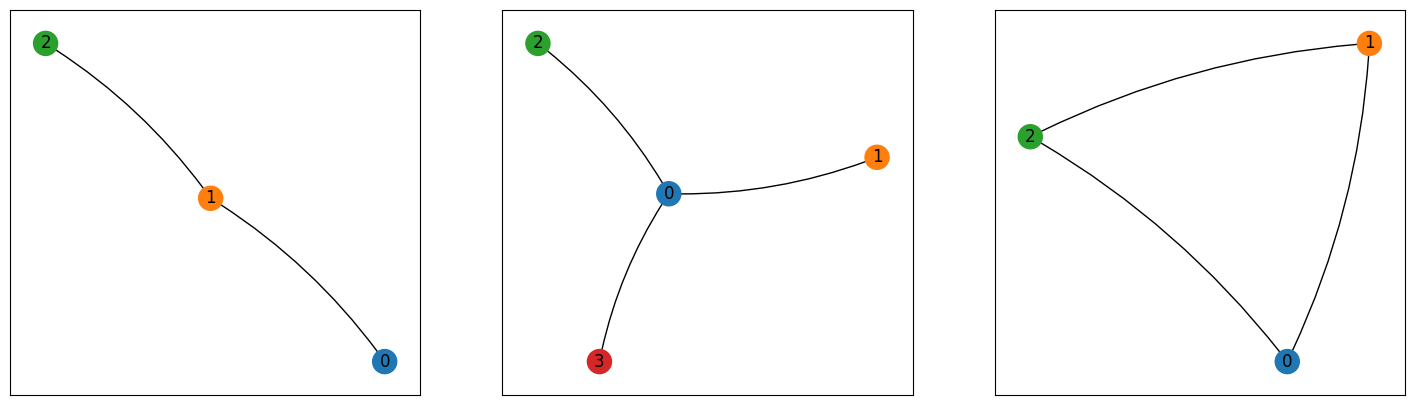

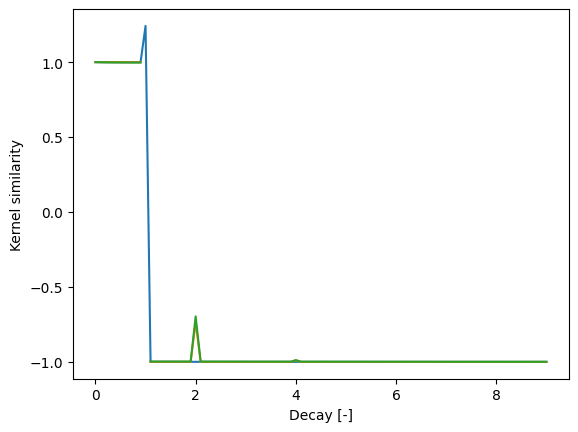

In [49]:
chain =  nx.path_graph(3)
star = nx.star_graph(3)
full = nx.complete_graph(3)

graphs = [chain, star, full]


#chain.add_node(30)

fig, axs = PlotUtils.wrap_subplots(len(graphs), len(graphs))
for i, graph in enumerate(graphs):
    PlotUtils.draw(graph, ax=axs[i])


m1 = GraphUtils.graph_to_transition_matrix(chain)
m2 = GraphUtils.graph_to_transition_matrix(star)
m3 = GraphUtils.graph_to_transition_matrix(full)

cvs = []
cvf = []
svf = []
decays = np.arange(0, 9.1, 0.1)
for decay in decays:
    cvs.append(RandomWalkKernel.weighted_random_walk_kernel(m1, m2, normalize=True, decay=decay))
    cvf.append(RandomWalkKernel.weighted_random_walk_kernel(m1, m3, normalize=True, decay=decay))
    svf.append(RandomWalkKernel.weighted_random_walk_kernel(m2, m3, normalize=True, decay=decay))

fig, ax = plt.subplots(1,1)
ax.plot(decays, cvs)
ax.plot(decays, cvf)
ax.plot(decays, svf)
ax.set(xlabel="Decay [-]", ylabel="Kernel similarity")

In [ ]:
chain = nx.path_graph(30)
star = nx.star_graph(30)
full = nx.complete_graph(30)

graphs = [chain, star, full]
matrices = [GraphUtils.graph_to_transition_matrix(graph) for graph in graphs]

fig, axs = PlotUtils.wrap_subplots(len(graphs), len(graphs))
for i, graph in enumerate(graphs):
    PlotUtils.draw(graph, ax=axs[i])

n = len(graphs)
y_values = [[] for pair in range(int((n * (n-1) / 2)))]

current_pair = -1
decays = np.arange(0, 1.1, 0.1)
for decay in decays:
    for i, g1 in enumerate(matrices):
        for j, g2 in enumerate(matrices):
            if i != j:
            
                y_values[i * j].append(RandomWalkKernel.weighted_random_walk_kernel(g1, g2, normalize=True, decay=decay))


fig, ax = plt.subplots(1,1)
for y in y_values:
    ax.plot(decay, y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.patches import Polygon

# Example points and associated colors
points = np.array([
    [0.2, 0.3],
    [0.5, 0.8],
    [0.8, 0.2]
])
colors = ['red', 'green', 'blue']  # one per point

# Compute Voronoi diagram
vor = Voronoi(points)

# Plot
fig, ax = plt.subplots(figsize=(6,6))

# Loop over regions
for region_index, point_index in enumerate(vor.point_region):
    region = vor.regions[point_index]
    if -1 in region or len(region) == 0:
        # skip infinite regions
        continue
    polygon = [vor.vertices[i] for i in region]
    ax.fill(*zip(*polygon), alpha=0.4, color=colors[region_index])

# Plot seed points
ax.plot(points[:,0], points[:,1], 'ko')
for i, (x, y) in enumerate(points):
    ax.text(x, y, f"P{i}", fontsize=12, ha='right')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
plt.show()



AttributeError: `ptp` was removed from the ndarray class in NumPy 2.0. Use np.ptp(arr, ...) instead.